### Term Project
### Project - 1
### Puppala Sucharitha
### Data Science, Bellevue University
### DSC680-T301 Applied Data Science (2233-1)
### Prof. Catherine Williams
### Date : 05/12/2022

In [1]:
# Importing all the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the heart dataset which is named diabetes.csv
diabdf = pd.read_csv('diabetes.csv')

In [3]:
# Getting the first 5 rows of the diabetes dataset.
diabdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Getting the shape of the diabetes dataset
diabdf.shape

(768, 9)

In [5]:
# Getting the size of the dataset
diabdf.size

6912

In [6]:
# Information about the dataset variables.
diabdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Checking for null values
diabdf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Checking if any duplicated values present in the data set.
diabdf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [9]:
# Getting the number of unique columns in the data set
diabdf.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
# Initially lets's use the describe() to get an idea on the dataset.
diabdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


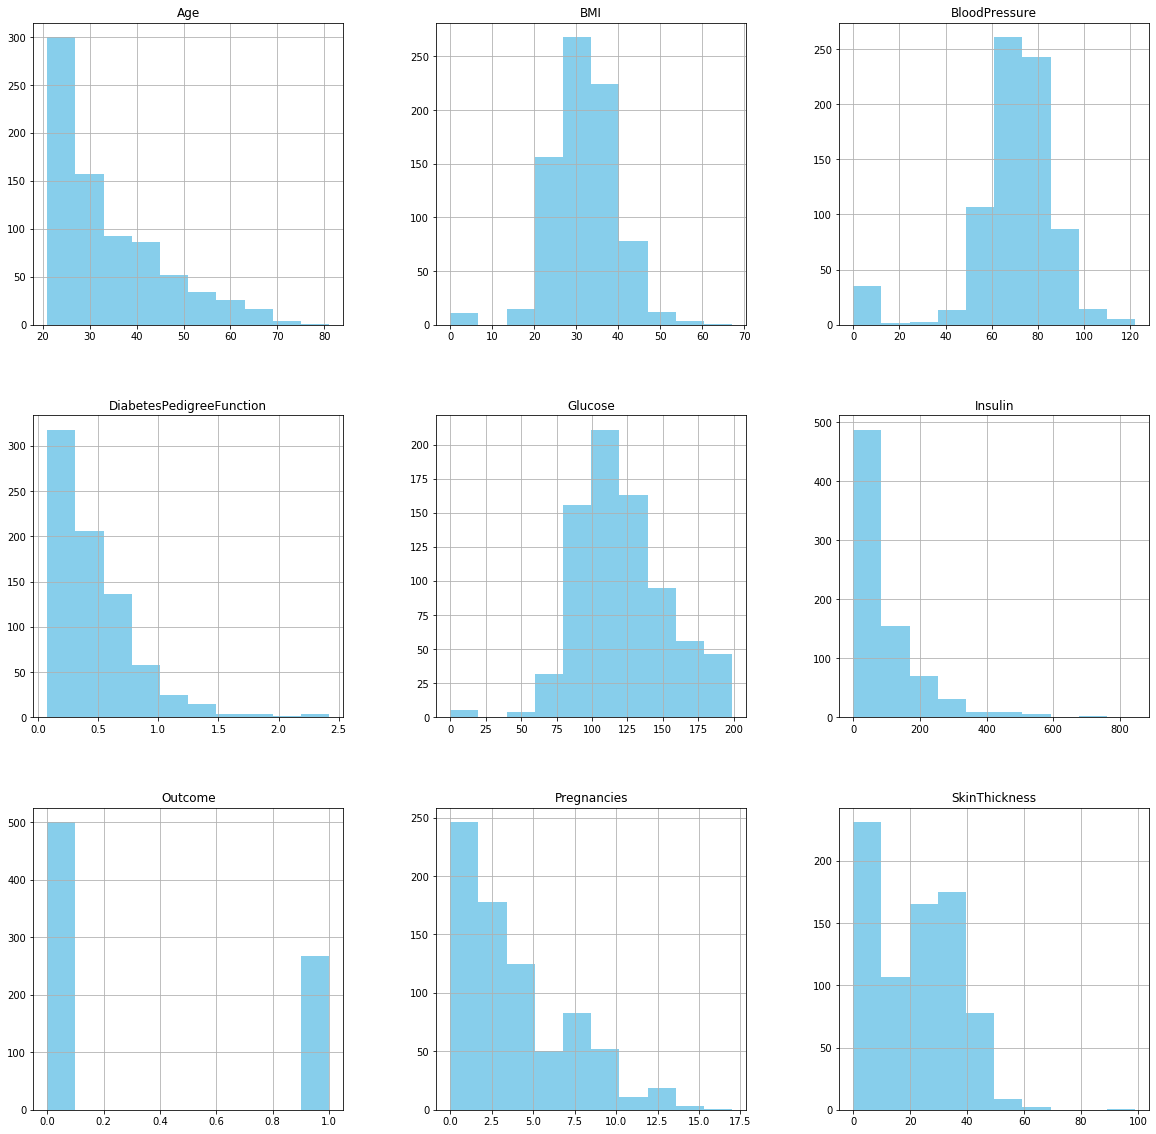

In [11]:
# Univariate analysis.
# plot histograms for each numerical variable
diabdf.hist(figsize = (20, 20),color='skyblue')
plt.show()

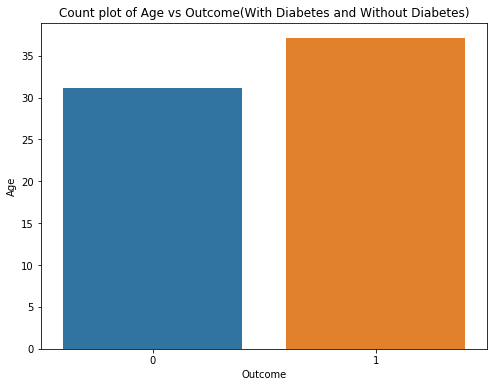

In [12]:
# bivariate analysis
# seaborn bar plot gives the variable average
# defining the plot size
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Age",data=diabdf,ci= False)
plt.title("Count plot of Age vs Outcome(With Diabetes and Without Diabetes)")
plt.show()

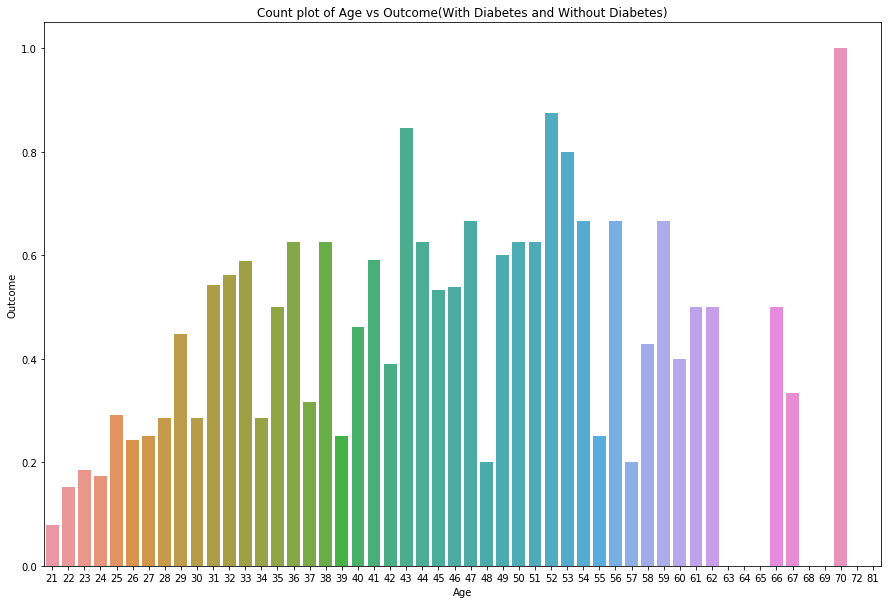

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x="Age",y="Outcome",data=diabdf,ci= False)
plt.title("Count plot of Age vs Outcome(With Diabetes and Without Diabetes)")
plt.show()

### Observations :

* From the above plot we can see that the female pregnant patients who are more that 35 years are more diabetic.

### Observations

* From the above count plot we see that 

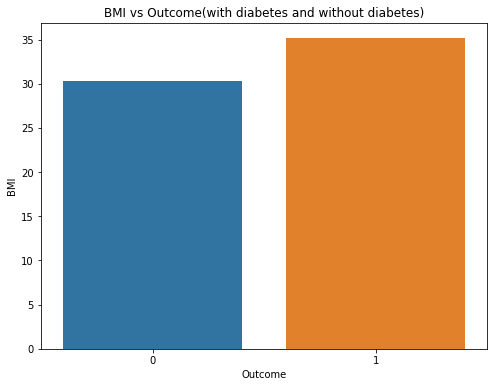

In [14]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="BMI",data=diabdf,ci= False)
plt.title("BMI vs Outcome(with diabetes and without diabetes)")
plt.show()

### Observations:

* From the above plot we see that the female pregnant patients having more BMI are diabetic.

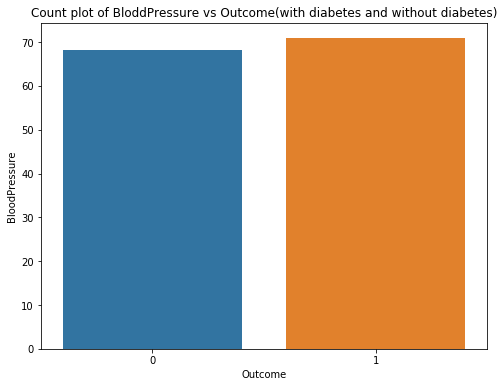

In [15]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="BloodPressure",data=diabdf,ci= False)
plt.title("Count plot of BloddPressure vs Outcome(with diabetes and without diabetes)")
plt.show()

### Observations:

* from the above plot we see that the BloodPressure values are high in female pregnant patients who tested positve for diabeticc.

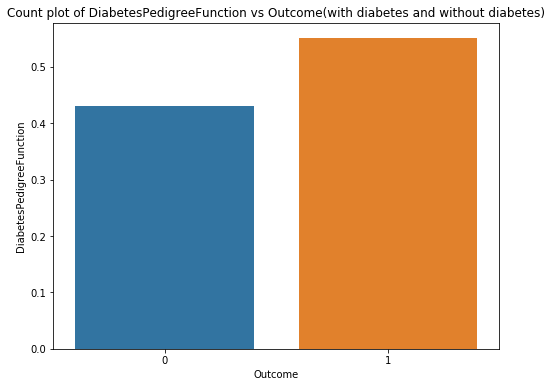

In [16]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="DiabetesPedigreeFunction",data=diabdf,ci= False)
plt.title("Count plot of DiabetesPedigreeFunction vs Outcome(with diabetes and without diabetes)")
plt.show()

### Observations:

* From the above plot we see that DiabetesPedigreeFunction values are high in the female pregnant patients having tested positive for diabetic.

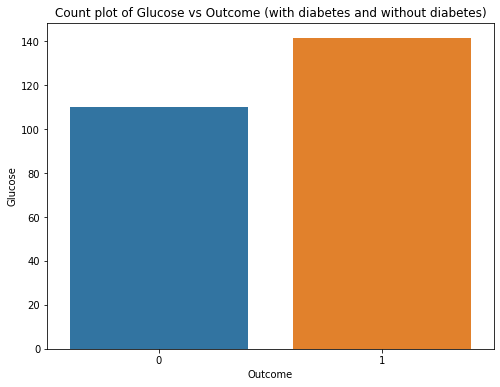

In [17]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Glucose",data=diabdf,ci= False)
plt.title("Count plot of Glucose vs Outcome (with diabetes and without diabetes)")
plt.show()

### Observations:

* from the above we see that the Glucose values are high in the female pregnant patients having tested positive for diabetic.

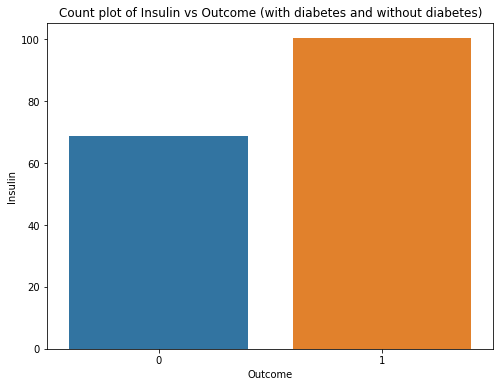

In [18]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Insulin",data=diabdf,ci= False)
plt.title("Count plot of Insulin vs Outcome (with diabetes and without diabetes)")
plt.show()

### Observations:

* From the above plot we can see that Insulin levels are high in the female pregnant patients who tested positive for diabetics.


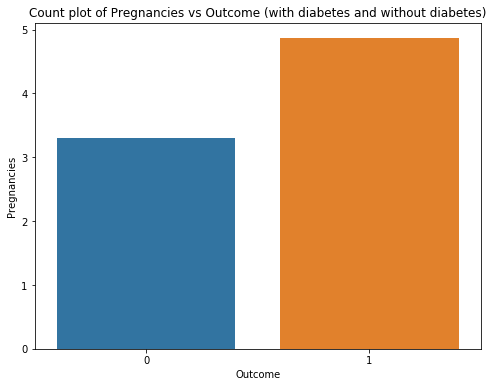

In [19]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="Pregnancies",data=diabdf,ci= False)
plt.title("Count plot of Pregnancies vs Outcome (with diabetes and without diabetes)")
plt.show()

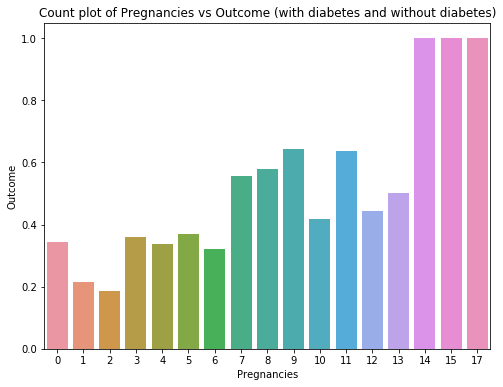

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(x="Pregnancies",y="Outcome",data=diabdf,ci= False)
plt.title("Count plot of Pregnancies vs Outcome (with diabetes and without diabetes)")
plt.show()

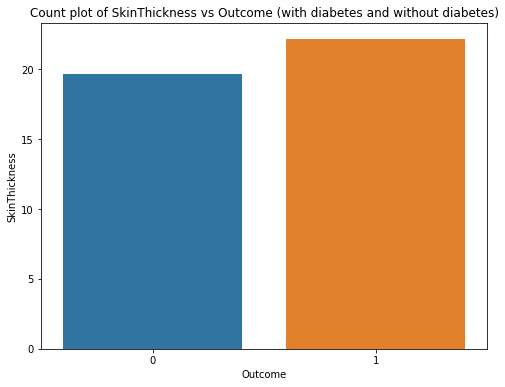

In [20]:
# seaborn bar plot gives the variable average
plt.figure(figsize=(8,6))
sns.barplot(x="Outcome",y="SkinThickness",data=diabdf,ci= False)
plt.title("Count plot of SkinThickness vs Outcome (with diabetes and without diabetes)")
plt.show()

### Observations:

* From the above we see that the skinthickness is more in the the female pregnant patients having tested positive for diabetes.

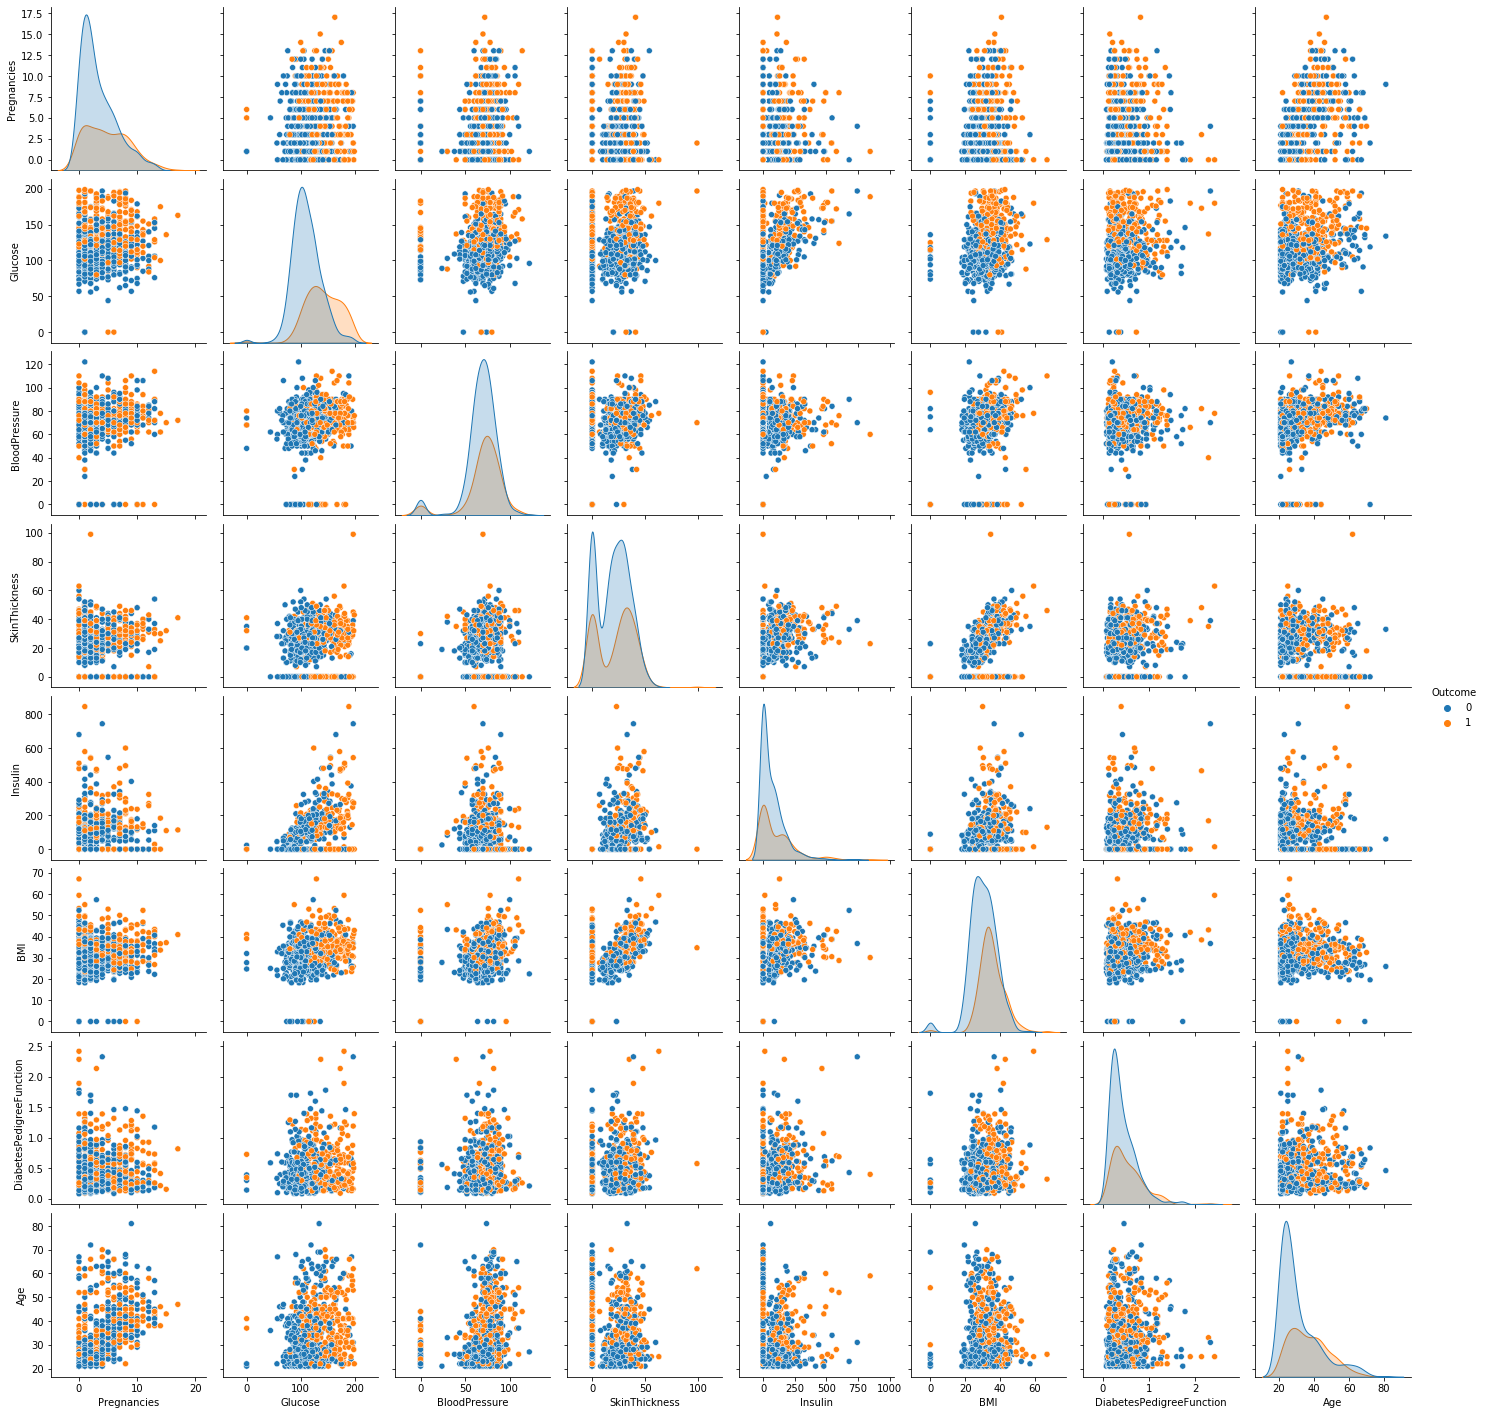

In [21]:
# Let's use pairplot() function from seaborn to understand the relationship between all features.

sns.pairplot(diabdf,hue="Outcome");

Text(0.5, 1, 'Correlation Heatmap of Diabetes dataset')

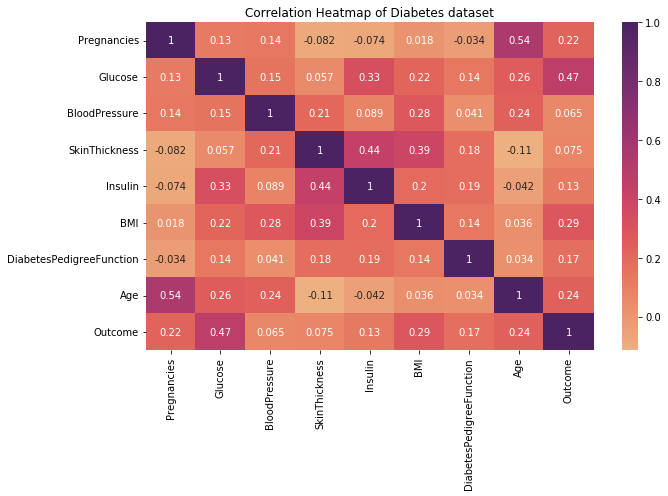

In [22]:
# Let's plot a correlation heatmap of the diabetes dataset.

# Calculate the correlation coefficient with corr().
corr_number = diabdf.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
sns.heatmap(corr_number, annot = True, cmap = 'flare')

# Title of the plot
plt.title('Correlation Heatmap of Diabetes dataset')


### Observations:

From the above correlation heat map we see that the features Glucose, BloodPressure,Age are have good correlation but with very low value of correlation coefficient.

Text(0.5, 1.0, 'Boxplot of the Diabetes dataset')

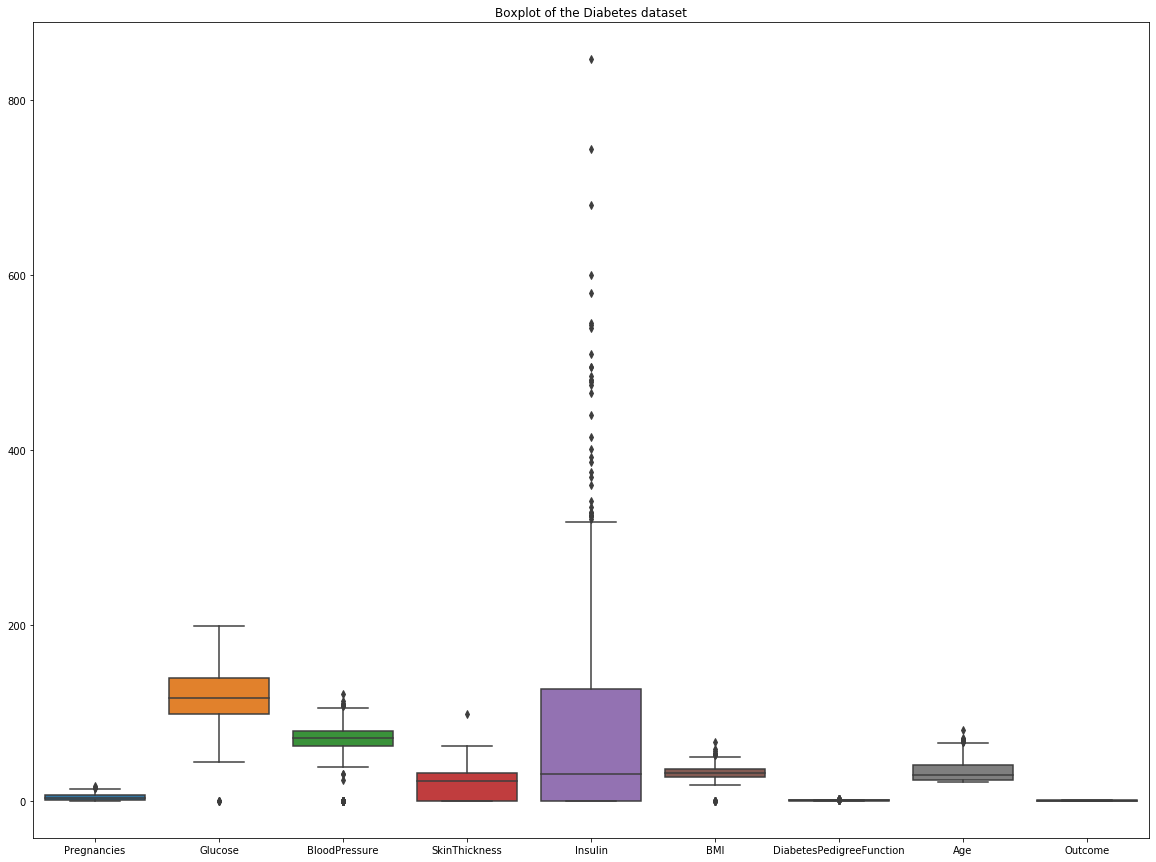

In [23]:
# let's plot a boxplot for the diabetes dataset.
plt.figure(figsize=(20,15))
sns.boxplot(data = diabdf)
# Plot title
plt.title('Boxplot of the Diabetes dataset')

### Observations :

From the above plot we can see that the features Glucose,BloodPressure, SkinThickness, Insulin are having some outliers 

In [24]:
#Let's define a function for detecting outliers using IQR method.

def outliers_IQR(df):

   q1 = df.quantile(0.25)

   q3 = df.quantile(0.75)

   IQR = q3-q1

   outlier = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outlier

In [25]:
# Now let's check for the outliers in features : Glucose.
outlier = outliers_IQR(diabdf['Glucose'])

print('Total number of outliers in feature Glucose : '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature Glucose : 5
Max. outlier value : 0
Min. outlier value : 0


In [26]:
# Outliers in -  BloodPressure

outlier = outliers_IQR(diabdf['BloodPressure'])

print('Total number of outliers in feature BloodPressure: '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature BloodPressure: 45
Max. outlier value : 122
Min. outlier value : 0


In [27]:
# Outliers in -  SkinThickness

outlier = outliers_IQR(diabdf['SkinThickness'])

print('Total number of outliers in feature SkinThickness: '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature SkinThickness: 1
Max. outlier value : 99
Min. outlier value : 99


In [28]:
# Outliers in -  Insulin

outlier = outliers_IQR(diabdf['Insulin'])

print('Total number of outliers in feature Insulin: '+ str(len(outlier)))

print('Max. outlier value : '+ str(outlier.max()))

print('Min. outlier value : '+ str(outlier.min()))

Total number of outliers in feature Insulin: 34
Max. outlier value : 846
Min. outlier value : 321


### Observations:

* When observed the outliers count in the features it is observed that the zeros are present in Glucose and SkinThickness are very less in number and can be ignored.

* Let us replace the zeros with the medican values of the feature column respectively.


In [29]:
# Let's calculate the median of the 'Glucose' column so as to replace the zeros with the median.
median = round(diabdf['Glucose'].median(),0)
median

117.0

In [30]:
# Let's replace the zeros from Glucose with the median.

diabdf['Glucose'].replace(0, diabdf['Glucose'].median(),inplace=True)
diabdf['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [31]:
# Let's calculate the median of the 'SkinThickness' column so as to replace the zeros with the median.
median = round(diabdf['SkinThickness'].median(),0)
median

23.0

In [32]:
# Now let's replace the zeros from SkinThickness with the median.

diabdf['SkinThickness'].replace(0, diabdf['SkinThickness'].median(),inplace=True)
diabdf['SkinThickness']

0      35
1      29
2      23
3      23
4      35
       ..
763    48
764    27
765    23
766    23
767    31
Name: SkinThickness, Length: 768, dtype: int64

Text(0.5, 1, 'Correlation Heatmap of Diabetes dataset')

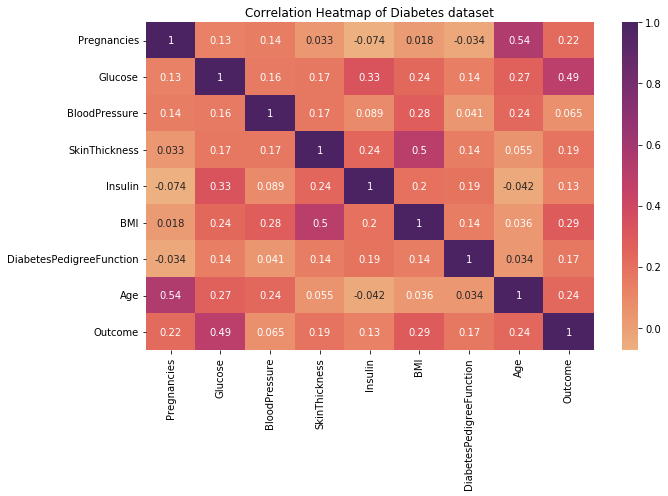

In [33]:
# Let's plot a correlation heatmap of the diabetes dataset.

# Calculate the correlation coefficient with corr().
corr_number = diabdf.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(10,7), tight_layout = True)
sns.heatmap(corr_number, annot = True, cmap = 'flare')

# Title of the plot
plt.title('Correlation Heatmap of Diabetes dataset')

### Observations:

From the above correlation heat map plotted after removal of the outliers we can see that the correlation between the features and the target are improved.

In [34]:
# Getting the shape of the diabetes dataset
diabdf.shape

(768, 9)

In [35]:
# Checking for any nulll values.
diabdf.isnull().sum().sum()

0

In [36]:
# Let's define the features and target variables X and y respectively.

X = diabdf.drop('Outcome', axis = 1)
y = diabdf['Outcome']

In [37]:
# Let's split the dataset into 80% train and 20% test datasets using train_test_split().
# Test size is 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [38]:
# Let's get the size of the test and train datasets.

print("X_train shape : {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))
print("y_train shape : {} rows.".format(y_train.shape[0]))
print("X_test shape : {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))
print("y_test shape : {} rows.".format(y_test.shape[0]))

X_train shape : 614 rows and 8 columns.
y_train shape : 614 rows.
X_test shape : 154 rows and 8 columns.
y_test shape : 154 rows.


In [39]:
# Using the standard scaler on X_train and X_test datasets.
# Fit the transform.

standscaler = StandardScaler()
X_train_std = standscaler.fit_transform(X_train)
X_test_std = standscaler.transform(X_test)

In [40]:
# Let's create a PCA that will retain 90% of the variance
pcah = PCA(n_components=0.90, whiten = True)

In [41]:
# Conduct PCA

X_train_pcah = pcah.fit_transform(X_train_std)

In [42]:
# Print the number of features of the train dataset.
print('Original number of features of the train dataset:', X_train.shape[1])
# Print the features of the PCA transformed train dataset.
print('Reduced number of features of the train dataset :', X_train_pcah.shape[1])

Original number of features of the train dataset: 8
Reduced number of features of the train dataset : 7


In [43]:
# Let's use the transform() method on the test features with PCA retaining 90% of the variance but not fit the transform.

X_test_pcah = pcah.transform(X_test_std)

### Model Building

### 1. Logistic Regression Model

In [44]:
# Create a Logistic Regression Model.

lgreg = LogisticRegression()

# Fitting the Logistic Regression Model.
lgreg = lgreg.fit(X_train, y_train)

# Let's get the predictions using the test dataset.
lgreg_pred = lgreg.predict(X_test)

# Let's get the predictions using the train dataset.
lgreg_pred_train = lgreg.predict(X_train)

In [45]:
# Let's create a Confusion Matrix for the test set predictions.
conmatrix = confusion_matrix(y_test, lgreg_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(Logistic Regression Model) : \n', conmatrix)

Confusion Matrix of Test set predictions(Logistic Regression Model) : 
 [[83 16]
 [18 37]]


Text(51.0, 0.5, 'Predicted values')

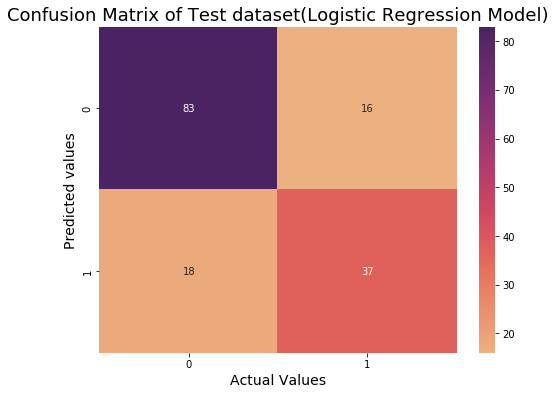

In [46]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(conmatrix, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test dataset(Logistic Regression Model)', fontsize = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values', fontsize = 14)

In [47]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the logistic regression model.
# Getting the accuracy score of the test dataset.
lgreg_accuracy = metrics.accuracy_score(y_test, lgreg_pred)

# Getting the accuracy score of the train dataset
lgreg_accu_train = metrics.accuracy_score(y_train, lgreg_pred_train)

# Getting the precision score.
lgreg_precision = round(precision_score(y_test, lgreg_pred),3)

# Getting the Recall Score.
lgreg_recall = round(recall_score(y_test, lgreg_pred),3)

# Getting the F1 Score.
lgreg_f1score = round(f1_score(y_test, lgreg_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the Logistic Regression Model on test dataset: {} '.format(lgreg_accuracy))
print('The accuracy score of the Logistic Regression Model on train dataset : {} '.format(lgreg_accu_train))
print('Precision Score of the test set for the Logistic Regression Model : {}'.format(lgreg_precision))
print('Recall Score of the test set for the Logistic Regression Model : {}'.format(lgreg_recall))
print('F1 Score of the test set for the Logistic Regression Model : {}'.format(lgreg_f1score))

The accuracy score of the Logistic Regression Model on test dataset: 0.7792207792207793 
The accuracy score of the Logistic Regression Model on train dataset : 0.7833876221498371 
Precision Score of the test set for the Logistic Regression Model : 0.698
Recall Score of the test set for the Logistic Regression Model : 0.673
F1 Score of the test set for the Logistic Regression Model : 0.685


### Logistic Regression Model (PCA):

In [48]:
# Create a Logistic Regression Model(PCA)
lgreg_pcah = LogisticRegression()

# Fit the model  to  train datasets(PCA)
lgreg_pcah.fit(X_train_pcah, y_train)

# Create prediction of the model using the test data(PCA)
lgreg_pcah_pred = lgreg_pcah.predict(X_test_pcah)

# Create prediction of the model using the train data(PCA)
lgreg_pcah_pred_train = lgreg_pcah.predict(X_train_pcah)

In [49]:
# Let's create a Confusion Matrix for the test set predictions.
conmatrix_pca = confusion_matrix(y_test, lgreg_pcah_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(Logistic Regression Model-PCA) : \n', conmatrix_pca)

Confusion Matrix of Test set predictions(Logistic Regression Model-PCA) : 
 [[81 18]
 [18 37]]


Text(51.0, 0.5, 'Predicted values')

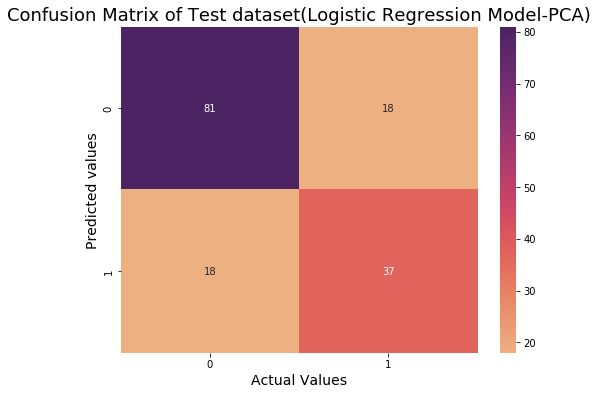

In [50]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(conmatrix_pca, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test dataset(Logistic Regression Model-PCA)', fontsize  = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values',fontsize = 14)

In [51]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the logistic regression model(PCA).
# Getting the accuracy score of the test dataset.
lgreg_pca_accuracy = metrics.accuracy_score(y_test, lgreg_pcah_pred)

# Getting the accuracy score of the train dataset
lgreg_pca_accu_train = metrics.accuracy_score(y_train, lgreg_pcah_pred_train)

# Getting the precision score.
lgreg_pca_precision = round(precision_score(y_test, lgreg_pcah_pred),3)

# Getting the Recall Score.
lgreg_pca_recall = round(recall_score(y_test, lgreg_pcah_pred),3)

# Getting the F1 Score.
lgreg_pca_f1score = round(f1_score(y_test, lgreg_pcah_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the Logistic Regression Model (PCA) on test dataset: {} '.format(lgreg_pca_accuracy))
print('The accuracy score of the Logistic Regression Model (PCA) on train dataset : {} '.format(lgreg_pca_accu_train))
print('Precision Score of the test set for the Logistic Regression Model (PCA): {}'.format(lgreg_pca_precision))
print('Recall Score of the test set for the Logistic Regression Model (PCA): {}'.format(lgreg_pca_recall))
print('F1 Score of the test set for the Logistic Regression Model (PCA): {}'.format(lgreg_pca_f1score))

The accuracy score of the Logistic Regression Model (PCA) on test dataset: 0.7662337662337663 
The accuracy score of the Logistic Regression Model (PCA) on train dataset : 0.7703583061889251 
Precision Score of the test set for the Logistic Regression Model (PCA): 0.673
Recall Score of the test set for the Logistic Regression Model (PCA): 0.673
F1 Score of the test set for the Logistic Regression Model (PCA): 0.673


### K - Nearest Neighbour Classifier Model :

In [52]:
# Create KNN classifier
knnclass = KNeighborsClassifier()

# Fit the model to train datasets.
knnclass = knnclass.fit(X_train, y_train )

# Create prediction of the model using the test data.
knnclass_pred = knnclass.predict(X_test)

# Create prediction of the model using the train data.
knnclass_pred_train = knnclass.predict(X_train)

In [53]:
# Let's create a Confusion Matrix for the test set predictions.
knnconmatrix = confusion_matrix(y_test, knnclass_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(KNN Classifier) : \n', knnconmatrix)

Confusion Matrix of Test set predictions(KNN Classifier) : 
 [[70 29]
 [22 33]]


Text(51.0, 0.5, 'Predicted values')

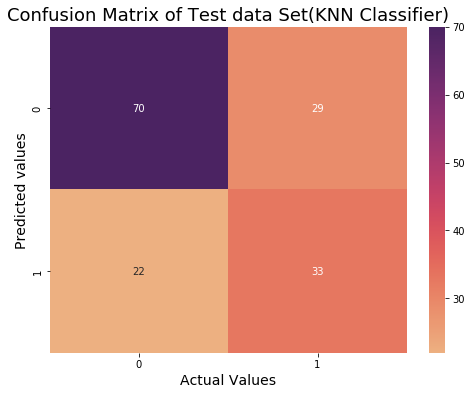

In [54]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(knnconmatrix, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test data Set(KNN Classifier)', fontsize  = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values', fontsize = 14)

In [55]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the KNN Classifier.
# Getting the accuracy score of the test dataset.
knnclass_accuracy = metrics.accuracy_score(y_test, knnclass_pred)

# Getting the accuracy score of the train dataset
knnclass_accu_train = metrics.accuracy_score(y_train, knnclass_pred_train)

# Getting the precision score.
knnclass_precision = round(precision_score(y_test, knnclass_pred),3)

# Getting the Recall Score.
knnclass_recall = round(recall_score(y_test, knnclass_pred),3)

# Getting the F1 Score.
knnclass_f1score = round(f1_score(y_test, knnclass_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the KNN Classifier on test dataset: {} '.format(knnclass_accuracy))
print('The accuracy score of the KNN Classifier on train dataset : {} '.format(knnclass_accu_train))
print('Precision Score of the test set for the KNN Classifier : {}'.format(knnclass_precision))
print('Recall Score of the test set for the KNN Classifier : {}'.format(knnclass_recall))
print('F1 Score of the test set for the KNN Classifier : {}'.format(knnclass_f1score))

The accuracy score of the KNN Classifier on test dataset: 0.6688311688311688 
The accuracy score of the KNN Classifier on train dataset : 0.8094462540716613 
Precision Score of the test set for the KNN Classifier : 0.532
Recall Score of the test set for the KNN Classifier : 0.6
F1 Score of the test set for the KNN Classifier : 0.564


### K - Nearest Neighbour Classifier Model (PCA) :

In [56]:
# Create KNN classifier
knnclass_pca = KNeighborsClassifier()

# Fit the model to train datasets.
knnclass_pca = knnclass_pca.fit(X_train_pcah, y_train )

# Create prediction of the model using the test data.
knnclass_pca_pred = knnclass_pca.predict(X_test_pcah)

# Create prediction of the model using the train data.
knnclass_pca_pred_train = knnclass_pca.predict(X_train_pcah)

In [57]:
# Let's create a Confusion Matrix for the test set predictions.
knnconmatrix_pca = confusion_matrix(y_test, knnclass_pca_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(KNN Classifier - PCA) : \n', knnconmatrix_pca)

Confusion Matrix of Test set predictions(KNN Classifier - PCA) : 
 [[76 23]
 [24 31]]


Text(51.0, 0.5, 'Predicted values')

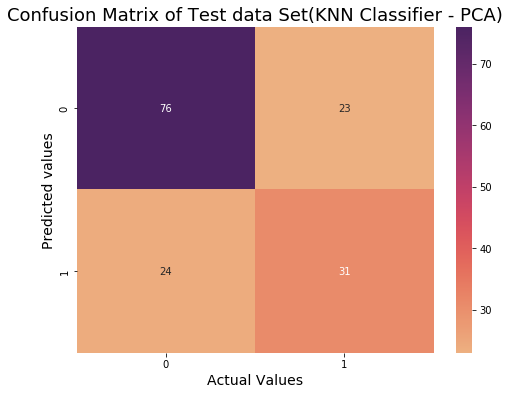

In [58]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(knnconmatrix_pca, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test data Set(KNN Classifier - PCA)', fontsize  = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values', fontsize = 14)

In [59]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the KNN Classifier(PCA).
# Getting the accuracy score of the test dataset.
knnclass_pca_accuracy = metrics.accuracy_score(y_test, knnclass_pca_pred)

# Getting the accuracy score of the train dataset
knnclass_pca_accu_train = metrics.accuracy_score(y_train, knnclass_pca_pred_train)

# Getting the precision score.
knnclass_pca_precision = round(precision_score(y_test, knnclass_pca_pred),3)

# Getting the Recall Score.
knnclass_pca_recall = round(recall_score(y_test, knnclass_pca_pred),3)

# Getting the F1 Score.
knnclass_pca_f1score = round(f1_score(y_test, knnclass_pca_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the KNN Classifier(PCA) on test dataset: {} '.format(knnclass_pca_accuracy))
print('The accuracy score of the KNN Classifier(PCA) on train dataset : {} '.format(knnclass_pca_accu_train))
print('Precision Score of the test set for the KNN Classifier(PCA) : {}'.format(knnclass_pca_precision))
print('Recall Score of the test set for the KNN Classifier(PCA) : {}'.format(knnclass_pca_recall))
print('F1 Score of the test set for the KNN Classifier(PCA) : {}'.format(knnclass_pca_f1score))

The accuracy score of the KNN Classifier(PCA) on test dataset: 0.6948051948051948 
The accuracy score of the KNN Classifier(PCA) on train dataset : 0.8192182410423453 
Precision Score of the test set for the KNN Classifier(PCA) : 0.574
Recall Score of the test set for the KNN Classifier(PCA) : 0.564
F1 Score of the test set for the KNN Classifier(PCA) : 0.569


### Decision Tree Classifier Model :

In [60]:
# Create Decision Tree classifier
dtclass = DecisionTreeClassifier()

# Fit the model to train datasets.
dtclass = dtclass.fit(X_train, y_train )

# Create prediction of the model using the test data.
dtclass_pred = dtclass.predict(X_test)

# Create prediction of the model using the train data.
dtclass_pred_train = dtclass.predict(X_train)

In [61]:
# Let's create a Confusion Matrix for the test set predictions.
dtconmatrix = confusion_matrix(y_test, dtclass_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(Decision Tree Classifier): \n', dtconmatrix)

Confusion Matrix of Test set predictions(Decision Tree Classifier): 
 [[75 24]
 [16 39]]


Text(51.0, 0.5, 'Predicted values')

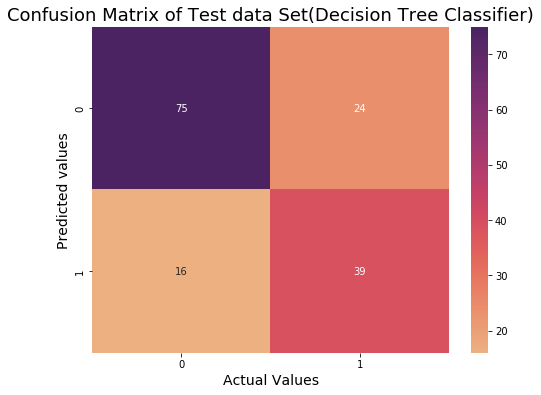

In [62]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(dtconmatrix, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test data Set(Decision Tree Classifier)', fontsize  = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values', fontsize = 14)

In [63]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the Decision Tree Classifier.
# Getting the accuracy score of the test dataset.
dtclass_accuracy = metrics.accuracy_score(y_test, dtclass_pred)

# Getting the accuracy score of the train dataset
dtclass_accu_train = metrics.accuracy_score(y_train, dtclass_pred_train)

# Getting the precision score.
dtclass_precision = round(precision_score(y_test, dtclass_pred),3)

# Getting the Recall Score.
dtclass_recall = round(recall_score(y_test, dtclass_pred),3)

# Getting the F1 Score.
dtclass_f1score = round(f1_score(y_test, dtclass_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the Decision Tree Classifier on test dataset: {} '.format(dtclass_accuracy))
print('The accuracy score of the Decision Tree Classifier on train dataset : {} '.format(dtclass_accu_train))
print('Precision Score of the test set for the Decision Tree Classifier : {}'.format(dtclass_precision))
print('Recall Score of the test set for the Decision Tree Classifier : {}'.format(dtclass_recall))
print('F1 Score of the test set for the Decision Tree Classifier : {}'.format(dtclass_f1score))

The accuracy score of the Decision Tree Classifier on test dataset: 0.7402597402597403 
The accuracy score of the Decision Tree Classifier on train dataset : 1.0 
Precision Score of the test set for the Decision Tree Classifier : 0.619
Recall Score of the test set for the Decision Tree Classifier : 0.709
F1 Score of the test set for the Decision Tree Classifier : 0.661


### Decision Tree Classifier Model (PCA) :

In [64]:
# Create Decision Tree classifier
dtclass_pca = DecisionTreeClassifier()

# Fit the model to train datasets.
dtclass_pca = dtclass_pca.fit(X_train_pcah, y_train )

# Create prediction of the model using the test data.
dtclass_pca_pred = dtclass_pca.predict(X_test_pcah)

# Create prediction of the model using the train data.
dtclass_pca_pred_train = dtclass_pca.predict(X_train_pcah)

In [65]:
# Let's create a Confusion Matrix for the test set predictions.
dtconmatrix_pca = confusion_matrix(y_test, dtclass_pca_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(Decision Tree Classifier- PCA): \n', dtconmatrix_pca)

Confusion Matrix of Test set predictions(Decision Tree Classifier- PCA): 
 [[71 28]
 [23 32]]


Text(51.0, 0.5, 'Predicted values')

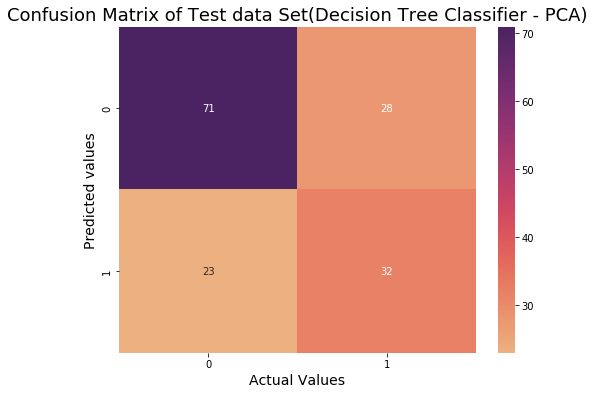

In [66]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(dtconmatrix_pca, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test data Set(Decision Tree Classifier - PCA)', fontsize  = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values', fontsize = 14)

In [67]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the Decision Tree Classifier(PCA).
# Getting the accuracy score of the test dataset.
dtclass_pca_accuracy = metrics.accuracy_score(y_test, dtclass_pca_pred)

# Getting the accuracy score of the train dataset
dtclass_pca_accu_train = metrics.accuracy_score(y_train, dtclass_pca_pred_train)

# Getting the precision score.
dtclass_pca_precision = round(precision_score(y_test, dtclass_pca_pred),3)

# Getting the Recall Score.
dtclass_pca_recall = round(recall_score(y_test, dtclass_pca_pred),3)

# Getting the F1 Score.
dtclass_pca_f1score = round(f1_score(y_test, dtclass_pca_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the Decision Tree Classifier (PCA)on test dataset: {} '.format(dtclass_pca_accuracy))
print('The accuracy score of the Decision Tree Classifier (PCA)on train dataset : {} '.format(dtclass_pca_accu_train))
print('Precision Score of the test set for the Decision Tree Classifier(PCA) : {}'.format(dtclass_pca_precision))
print('Recall Score of the test set for the Decision Tree Classifier (PCA): {}'.format(dtclass_pca_recall))
print('F1 Score of the test set for the Decision Tree Classifier (PCA) : {}'.format(dtclass_pca_f1score))

The accuracy score of the Decision Tree Classifier (PCA)on test dataset: 0.6688311688311688 
The accuracy score of the Decision Tree Classifier (PCA)on train dataset : 1.0 
Precision Score of the test set for the Decision Tree Classifier(PCA) : 0.533
Recall Score of the test set for the Decision Tree Classifier (PCA): 0.582
F1 Score of the test set for the Decision Tree Classifier (PCA) : 0.557


### Support Vector Machine Model :

In [68]:
# Create Support Vector Machine Classifier

svmclass = SVC(kernel='linear', C=1)

# Fit the model to train datasets.
svmclass = svmclass.fit(X_train, y_train )

# Create prediction of the model using the test data.
svmclass_pred = svmclass.predict(X_test)

# Create prediction of the model using the train data.
svmclass_pred_train = svmclass.predict(X_train)

In [69]:
# Let's create a Confusion Matrix for the test set predictions.
svmconmatrix = confusion_matrix(y_test, svmclass_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(Support Vector Machine Classifier): \n', svmconmatrix)

Confusion Matrix of Test set predictions(Support Vector Machine Classifier): 
 [[80 19]
 [19 36]]


Text(51.0, 0.5, 'Predicted values')

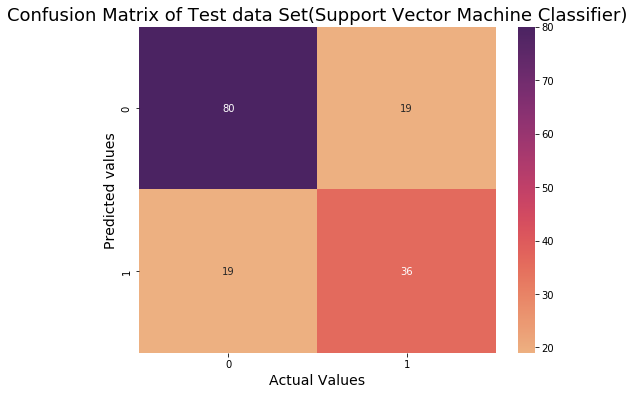

In [70]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(svmconmatrix, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test data Set(Support Vector Machine Classifier)', fontsize  = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values', fontsize = 14)

In [71]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the Support Vector Machine Classifier.
# Getting the accuracy score of the test dataset.
svmclass_accuracy = metrics.accuracy_score(y_test, svmclass_pred)

# Getting the accuracy score of the train dataset
svmclass_accu_train = metrics.accuracy_score(y_train, svmclass_pred_train)

# Getting the precision score.
svmclass_precision = round(precision_score(y_test, svmclass_pred),3)

# Getting the Recall Score.
svmclass_recall = round(recall_score(y_test, svmclass_pred),3)

# Getting the F1 Score.
svmclass_f1score = round(f1_score(y_test, svmclass_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the SVM Classifier on test dataset: {} '.format(svmclass_accuracy))
print('The accuracy score of the SVM Classifier on train dataset : {} '.format(svmclass_accu_train))
print('Precision Score of the test set for the SVM Classifier : {}'.format(svmclass_precision))
print('Recall Score of the test set for the SVM Classifier : {}'.format(svmclass_recall))
print('F1 Score of the test set for the SVM Classifier : {}'.format(svmclass_f1score))

The accuracy score of the SVM Classifier on test dataset: 0.7532467532467533 
The accuracy score of the SVM Classifier on train dataset : 0.7736156351791531 
Precision Score of the test set for the SVM Classifier : 0.655
Recall Score of the test set for the SVM Classifier : 0.655
F1 Score of the test set for the SVM Classifier : 0.655


### Support Vector Machine Model (PCA):

In [72]:
# Create Support Vector Machine Classifier

svmclass_pca = SVC(kernel='linear', C=1)

# Fit the model to train datasets.
svmclass_pca = svmclass_pca.fit(X_train_pcah, y_train )

# Create prediction of the model using the test data.
svmclass_pca_pred = svmclass_pca.predict(X_test_pcah)

# Create prediction of the model using the train data.
svmclass_pca_pred_train = svmclass_pca.predict(X_train_pcah)

In [73]:
# Let's create a Confusion Matrix for the test set predictions.
svmconmatrix_pca = confusion_matrix(y_test, svmclass_pred)

# Print the Confusion matrix.
print('Confusion Matrix of Test set predictions(Support Vector Machine Classifier - PCA): \n', svmconmatrix_pca)

Confusion Matrix of Test set predictions(Support Vector Machine Classifier - PCA): 
 [[80 19]
 [19 36]]


Text(51.0, 0.5, 'Predicted values')

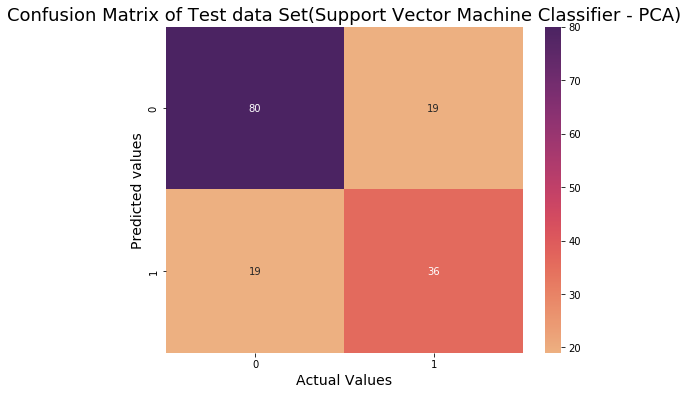

In [74]:
# Plot the confusion matrix.
# Define the size of the plot
plt.figure(figsize=(8,6))
#  Confusion matrix heat map.
sns.heatmap(svmconmatrix_pca, annot=True,cmap = 'flare', fmt='d')
# Plot Title
plt.title('Confusion Matrix of Test data Set(Support Vector Machine Classifier - PCA)', fontsize  = 18)
# x- Label
plt.xlabel('Actual Values', fontsize = 14)
# y-label
plt.ylabel('Predicted values', fontsize = 14)

In [75]:
# Let's get the accuracy score, Precision, Recall and F1 Score of the Support Vector Machine Classifier(PCA).
# Getting the accuracy score of the test dataset.
svmclass_pca_accuracy = metrics.accuracy_score(y_test, svmclass_pca_pred)

# Getting the accuracy score of the train dataset
svmclass_pca_accu_train = metrics.accuracy_score(y_train, svmclass_pca_pred_train)

# Getting the precision score.
svmclass_pca_precision = round(precision_score(y_test, svmclass_pca_pred),3)

# Getting the Recall Score.
svmclass_pca_recall = round(recall_score(y_test, svmclass_pca_pred),3)

# Getting the F1 Score.
svmclass_pca_f1score = round(f1_score(y_test, svmclass_pca_pred),3)


# Printing the accuracy of the model.
print('The accuracy score of the SVM Classifier(PCA) on test dataset: {} '.format(svmclass_pca_accuracy))
print('The accuracy score of the SVM Classifier(PCA) on train dataset : {} '.format(svmclass_pca_accu_train))
print('Precision Score of the test set for the SVM Classifier(PCA) : {}'.format(svmclass_pca_precision))
print('Recall Score of the test set for the SVM Classifier(PCA) : {}'.format(svmclass_pca_recall))
print('F1 Score of the test set for the SVM Classifier(PCA) : {}'.format(svmclass_pca_f1score))

The accuracy score of the SVM Classifier(PCA) on test dataset: 0.7662337662337663 
The accuracy score of the SVM Classifier(PCA) on train dataset : 0.7719869706840391 
Precision Score of the test set for the SVM Classifier(PCA) : 0.679
Recall Score of the test set for the SVM Classifier(PCA) : 0.655
F1 Score of the test set for the SVM Classifier(PCA) : 0.667


### Summary of the evaluation metrics calculated using trained and test datasets for the 4 models

In [76]:
# Let's form arrays for the calculated accuracy score for the train and test datasets, Precision, 
# Recall and F1 Score for the above three models.

logistic_reg = {'Model':'Logistic Regression',
               'Accuracy (test)':lgreg_accuracy,
              'Accuracy (train)':lgreg_accu_train,
              'Precision score' :lgreg_precision,
              'Recall score'    :lgreg_recall,
               'F1 Score':lgreg_f1score,}

KNN_classifier = {'Model':'KNN Classifier',
                 'Accuracy (test)':knnclass_accuracy,
              'Accuracy (train)':knnclass_accu_train,
              'Precision score' :knnclass_precision,
              'Recall score'    :knnclass_recall,
               'F1 Score':knnclass_f1score,}

DecisionTree_classifier = {'Model':'Decision Tree Classifier',
                         'Accuracy (test)':dtclass_accuracy,
                          'Accuracy (train)':dtclass_accu_train,
                         'Precision score' :dtclass_precision,
                         'Recall score'    :dtclass_recall,
                          'F1 Score':dtclass_f1score,}

SVM_classifier = {'Model':'Support Vector Machine Model',
               'Accuracy (test)':svmclass_accuracy,
              'Accuracy (train)':svmclass_accu_train,
              'Precision score' :svmclass_precision,
              'Recall score'    :svmclass_recall,
               'F1 Score':svmclass_f1score,}

In [77]:
# Let's group the results of the three models using the pd.series()
models_evalmetrics = pd.DataFrame({'Logistic Regression Model':pd.Series(logistic_reg),
                        'KNN Classifier': pd.Series(KNN_classifier),          
                       'Decision Tree Classifier Model':pd.Series(DecisionTree_classifier),
                       'Support Vector Machine Model':pd.Series(SVM_classifier),           
                      })

models_evalmetrics

,Logistic Regression Model,KNN Classifier,Decision Tree Classifier Model,Support Vector Machine Model
Model,Logistic Regression,KNN Classifier,Decision Tree Classifier,Support Vector Machine Model
Accuracy (test),0.779221,0.668831,0.74026,0.753247
Accuracy (train),0.783388,0.809446,1,0.773616
Precision score,0.698,0.532,0.619,0.655
Recall score,0.673,0.6,0.709,0.655
F1 Score,0.685,0.564,0.661,0.655


### Summary of the evaluation metrics calculated using PCA applied trained and test datasets for the 4 Models.

In [78]:
logistic_reg = {'Model':'Logistic Regression(PCA)',
               'Accuracy (test)':lgreg_pca_accuracy,
              'Accuracy (train)':lgreg_pca_accu_train,
              'Precision score' :lgreg_pca_precision,
              'Recall score'    :lgreg_pca_recall,
               'F1 Score':lgreg_pca_f1score,}

KNN_classifier = {'Model':'KNN Classifier(PCA)',
                 'Accuracy (test)':knnclass_pca_accuracy,
              'Accuracy (train)':knnclass_pca_accu_train,
              'Precision score' :knnclass_pca_precision,
              'Recall score'    :knnclass_pca_recall,
               'F1 Score':knnclass_pca_f1score,}

DecisionTree_classifier = {'Model':'Decision Tree Classifier(PCA)',
                          'Accuracy (test)':dtclass_pca_accuracy,
                          'Accuracy (train)':dtclass_pca_accu_train,
                          'Precision score' :dtclass_pca_precision,
                          'Recall score'    :dtclass_pca_recall,
                           'F1 Score':dtclass_pca_f1score,}

SVM_classifier = {'Model':'Support Vector Machine Model(PCA)',
                'Accuracy (test)':svmclass_pca_accuracy,
              'Accuracy (train)':svmclass_pca_accu_train,
              'Precision score' :svmclass_pca_precision,
              'Recall score'    :svmclass_pca_recall,
               'F1 Score':svmclass_pca_f1score,}


In [79]:
# Let's group the results of the three models using the pd.series()
models_evalmetrics = pd.DataFrame({'Logistic Regression Model':pd.Series(logistic_reg),
                        'KNN Classifier': pd.Series(KNN_classifier),          
                       'Decision Tree Classifier Model':pd.Series(DecisionTree_classifier),
                       'Support Vector Machine Model':pd.Series(SVM_classifier),           
                      })

models_evalmetrics

,Logistic Regression Model,KNN Classifier,Decision Tree Classifier Model,Support Vector Machine Model
Model,Logistic Regression(PCA),KNN Classifier(PCA),Decision Tree Classifier(PCA),Support Vector Machine Model(PCA)
Accuracy (test),0.766234,0.694805,0.668831,0.766234
Accuracy (train),0.770358,0.819218,1,0.771987
Precision score,0.673,0.574,0.533,0.679
Recall score,0.673,0.564,0.582,0.655
F1 Score,0.673,0.569,0.557,0.667
